In [54]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import glob
import librosa
import librosa.display
import soundfile
from IPython.display import Audio

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [55]:
# import kagglehub

# custom_path = "../artifacts/dataset"

# # Download latest version
# path = kagglehub.dataset_download("vishlb/speech-emotion-recognition-hindi", path=custom_path)

# print("Path to dataset files:", path)

In [56]:
import os

data_dir = Path('../artifacts/dataset')

for dirname, _, filenames in os.walk(data_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

..\artifacts\dataset\DATASET DETAILS ABVV.xlsx
..\artifacts\dataset\dataset sentences and details.docx
..\artifacts\dataset\1\session1\anger\1.1.anger-01.wav
..\artifacts\dataset\1\session1\anger\1.1.anger-02.wav
..\artifacts\dataset\1\session1\anger\1.1.anger-03.wav
..\artifacts\dataset\1\session1\anger\1.1.anger-04.wav
..\artifacts\dataset\1\session1\anger\1.1.anger-05.wav
..\artifacts\dataset\1\session1\anger\1.1.anger-06.wav
..\artifacts\dataset\1\session1\anger\1.1.anger-07.wav
..\artifacts\dataset\1\session1\anger\1.1.anger-08.wav
..\artifacts\dataset\1\session1\anger\1.1.anger-09.wav
..\artifacts\dataset\1\session1\anger\1.1.anger-10.wav
..\artifacts\dataset\1\session1\disgust\1.1.disgust-01.wav
..\artifacts\dataset\1\session1\disgust\1.1.disgust-02.wav
..\artifacts\dataset\1\session1\disgust\1.1.disgust-03.wav
..\artifacts\dataset\1\session1\disgust\1.1.disgust-04.wav
..\artifacts\dataset\1\session1\disgust\1.1.disgust-05.wav
..\artifacts\dataset\1\session1\disgust\1.1.disgust-

In [57]:
paths = []
labels = []

# Walk through the dataset directory
for dirname, _, filenames in os.walk(data_dir):
    for filename in filenames:
        # Extract the emotion label from the filename
        label = filename.split('_')[-1]
        # Remove the file extension if it's present
        label = label.split('.')[0].lower()
        
        # Append the full file path to paths and the extracted label to labels
        paths.append(os.path.join(dirname, filename))
        labels.append(label)

print('Dataset is Loaded')

Dataset is Loaded


In [58]:
len(paths)

3202

In [59]:
paths[:7]

['..\\artifacts\\dataset\\DATASET DETAILS ABVV.xlsx',
 '..\\artifacts\\dataset\\dataset sentences and details.docx',
 '..\\artifacts\\dataset\\1\\session1\\anger\\1.1.anger-01.wav',
 '..\\artifacts\\dataset\\1\\session1\\anger\\1.1.anger-02.wav',
 '..\\artifacts\\dataset\\1\\session1\\anger\\1.1.anger-03.wav',
 '..\\artifacts\\dataset\\1\\session1\\anger\\1.1.anger-04.wav',
 '..\\artifacts\\dataset\\1\\session1\\anger\\1.1.anger-05.wav']

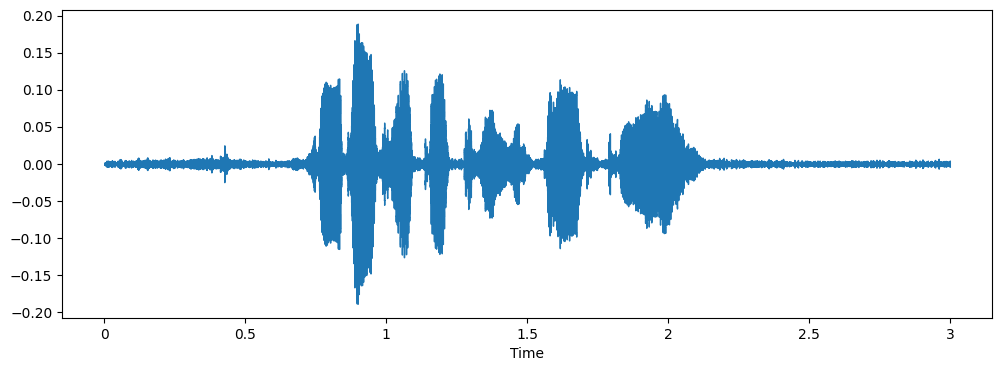

In [60]:
data, sampling_rate = librosa.load('../artifacts/dataset/1/session1/anger/1.1.anger-01.wav')

plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sampling_rate)

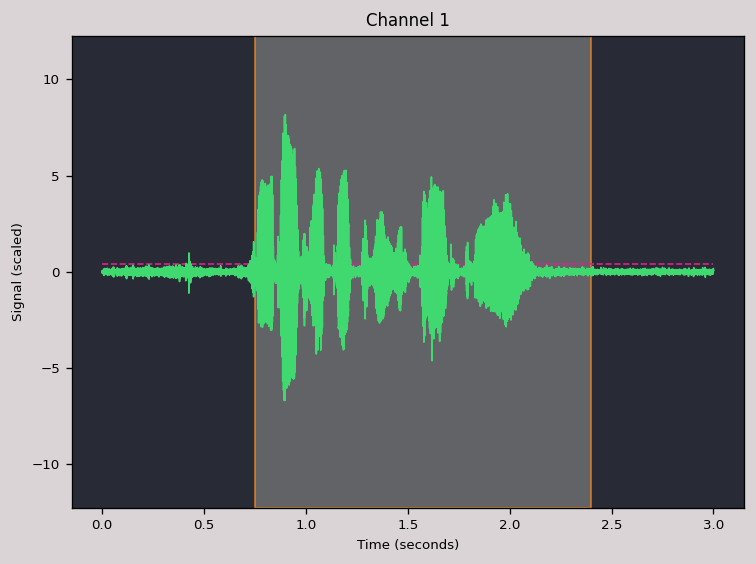

[<AudioRegion(duration=1.650, sampling_rate=16000, sample_width=2, channels=1)>]

In [61]:
import auditok

sample_speech = auditok.load('../artifacts/dataset/1/session1/anger/1.1.anger-01.wav')
sample_speech.splitp()

In [62]:
samples = np.asarray(sample_speech)
samples

array([[-26., -15.,  -9., ...,  51.,  37.,  38.]])

In [63]:
def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

def get_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    img = librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    height = img._meshHeight
    img = img.get_array().reshape(img._meshWidth, img._meshHeight)
    img = np.array(img)
    return img

*******************************************HAPPY*****************************************


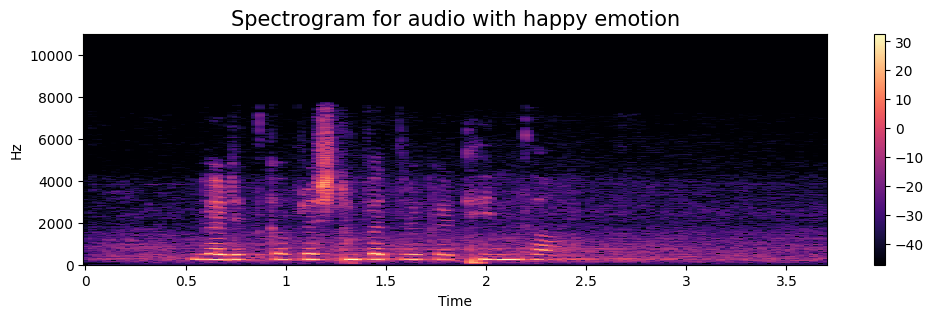

In [64]:
print("*******************************************HAPPY*****************************************")
happy_emotion='happy'
happy_path = '../artifacts/dataset/1/session1/happy/1.1.happy-02.wav'
data, sampling_rate = librosa.load(happy_path)
create_spectrogram(data, sampling_rate, happy_emotion)
Audio(happy_path)

*******************************************NEUTRAL*****************************************


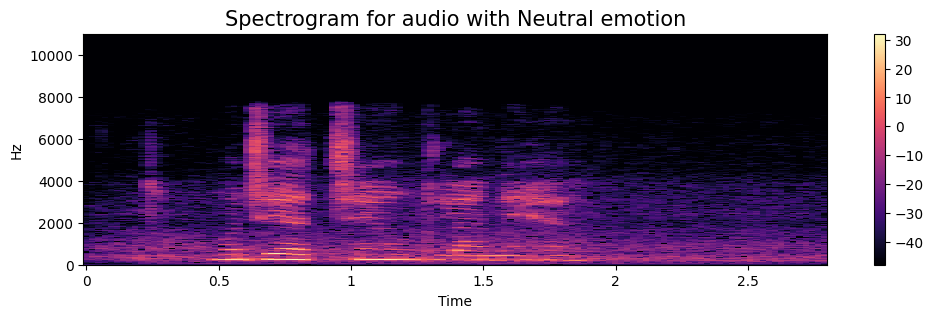

In [65]:
print("*******************************************NEUTRAL*****************************************")
neutral_emotion='Neutral'
neutral_path = '../artifacts/dataset/1/session1/neutral/1.1.neutral-03.wav'
data, sampling_rate = librosa.load(neutral_path)
create_spectrogram(data, sampling_rate, neutral_emotion)
Audio(neutral_path)

*******************************************ANGRY*****************************************


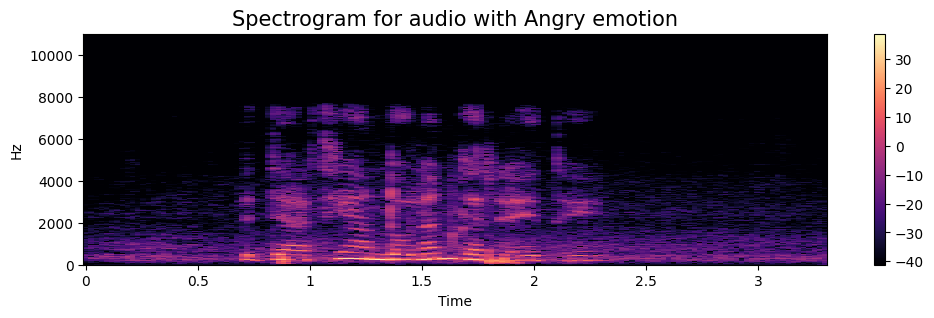

In [66]:
print("*******************************************ANGRY*****************************************")
angry_emotion='Angry'
angry_path = '../artifacts/dataset/1/session1/anger/1.1.anger-05.wav'
data, sampling_rate = librosa.load(angry_path)
create_spectrogram(data, sampling_rate, angry_emotion)
Audio(angry_path)

*******************************************FEAR*****************************************


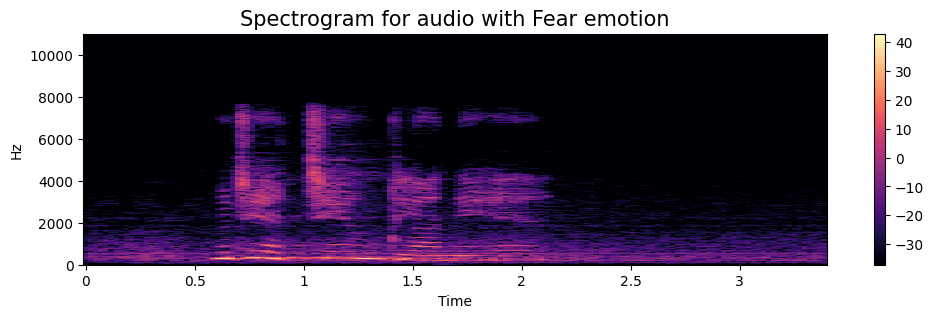

In [67]:
print("*******************************************FEAR*****************************************")
fear_emotion='Fear'
fear_path = '../artifacts/dataset/1/session1/fear/1.1.fear-03.wav'
data, sampling_rate = librosa.load(fear_path)
create_spectrogram(data, sampling_rate, fear_emotion)
Audio(fear_path)

In [68]:
import speech_recognition as sr

sr.__version__
recog = sr.Recognizer()

speech = sr.AudioFile(fear_path)
with speech as source:
    audio = recog.record(source)
recog.recognize_google(audio)

'Mujhe Acche ank laane Hain'

In [69]:
speech = sr.AudioFile(angry_path)
with speech as source:
    audio1 = recog.record(source)
recog.recognize_google(audio1, language='hi-In')

'विद्यार्थी आंदोलन कर रहे थे'

In [70]:
print(len(sample_speech))

print(sample_speech.duration) # duration in seconds
print(sample_speech.sampling_rate) # alias `sr`
print(sample_speech.sample_width) # alias `sw`
print(sample_speech.channels) # alias `ch`

48000
3.0
16000
2
1


Region 0: 0.500s -- 2.750s
Region 0: 0.700s -- 2.600s
Region 0: 0.600s -- 2.450s
Region 0: 0.450s -- 2.150s


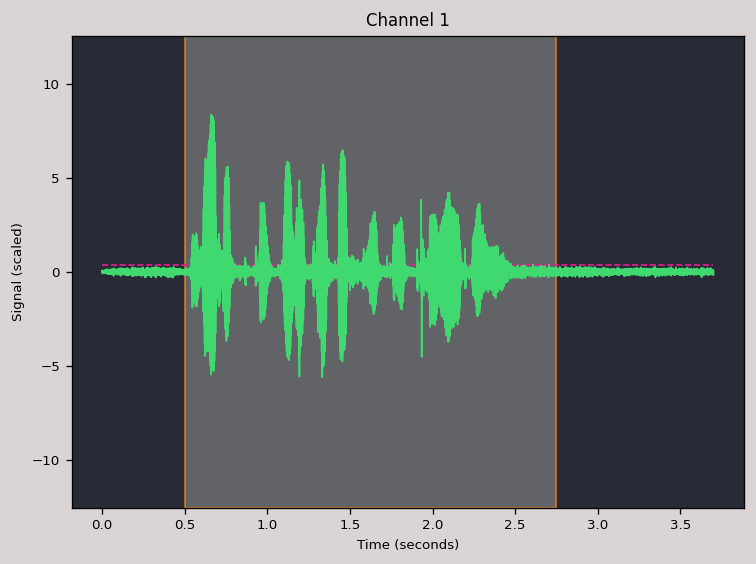

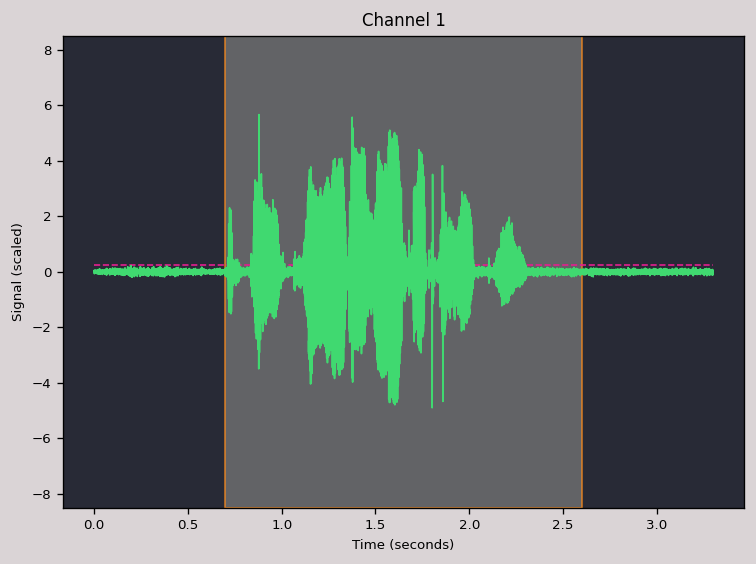

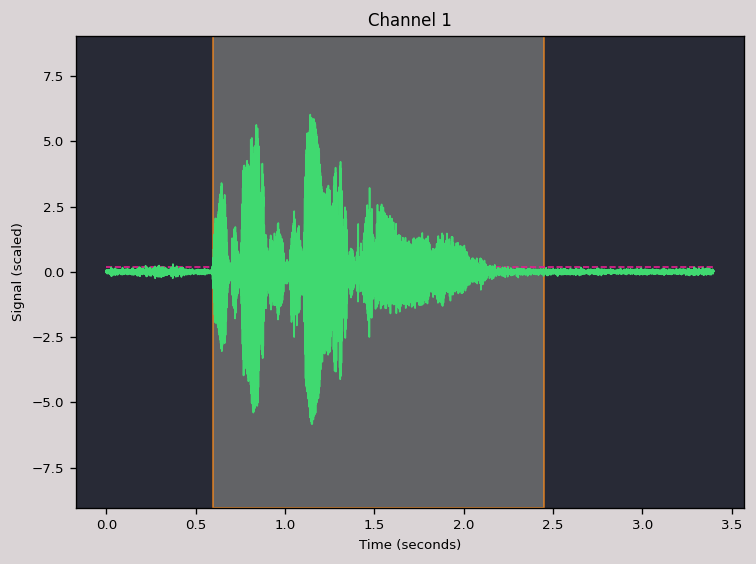

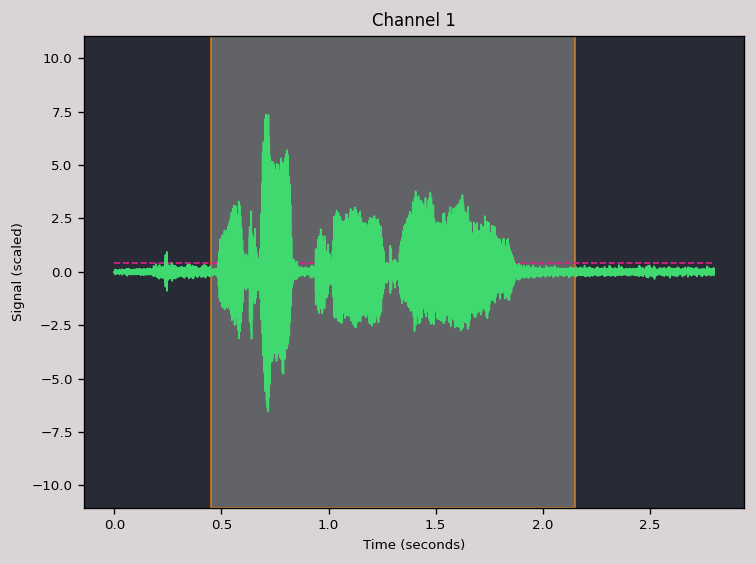

In [71]:
from pydub import AudioSegment
from pydub.silence import split_on_silence

sound_file = AudioSegment.from_wav(fear_path)
audio_chunks = split_on_silence(sound_file, 
    # must be silent for at least half a second
    min_silence_len=100,

    # consider it silent if quieter than -16 dBFS
    silence_thresh=-16
)

for i, chunk in enumerate(audio_chunks):

    out_file = "chunk{0}.wav".format(i)
    print("exporting", out_file)
    chunk.export(out_file, format="wav")

text_path= [happy_path, angry_path, fear_path, neutral_path]
text_list = []
lan = 'hi-IN'

for path in text_path:
    texts = ''
    audio_regions = auditok.split(path)

    for i, r in enumerate(audio_regions):
        print("Region {i}: {r.meta.start:.3f}s -- {r.meta.end:.3f}s".format(i=i, r=r))  
        filename = r.save("region_{meta.start:.3f}-{meta.end:.3f}.wav")
        speech = sr.AudioFile(filename)
        print(speech)
        with speech as source:
            audio1 = recog.record(source)
        try:
            text = recog.recognize_google(audio1, language=lan)
            texts+= str(text)
            os.remove(filename)
        except:
            pass
    text_list.append(texts)

for path in text_path:
    sample_speech = auditok.load(path)
    sample_speech.splitp()

In [72]:
speech = sr.AudioFile(text_path[3])
with speech as source:
    audio1 = recog.record(source)
text = recog.recognize_google(audio1, language=lan)
print(text)

Audio(path)

मुझे अच्छे अंक लाने हैं


Spectral analysis

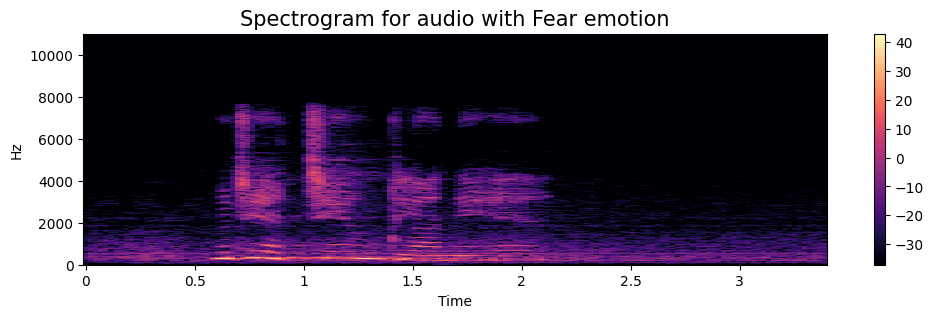

In [73]:
# Continous Wavelet Transform
data, sampling_rate = librosa.load(fear_path)
create_spectrogram(data, sampling_rate, fear_emotion)

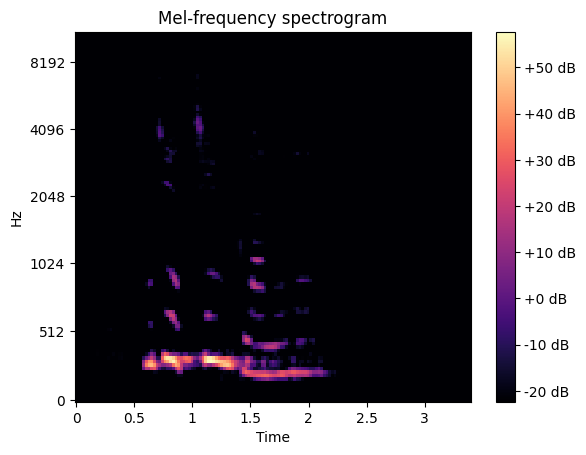

In [74]:
def create_melspectrogram(data,sr,e):
    D = np.abs(librosa.stft(data))**2
    S = librosa.feature.melspectrogram(S=D, sr=sr)
    Xdb = librosa.amplitude_to_db(abs(S))
    fig, ax = plt.subplots()
    img = librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='mel')
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    ax.set(title='Mel-frequency spectrogram')

data, sampling_rate = librosa.load(fear_path)
create_melspectrogram(data, sampling_rate, fear_emotion)

[Text(0.5, 1.0, 'Chromagram')]

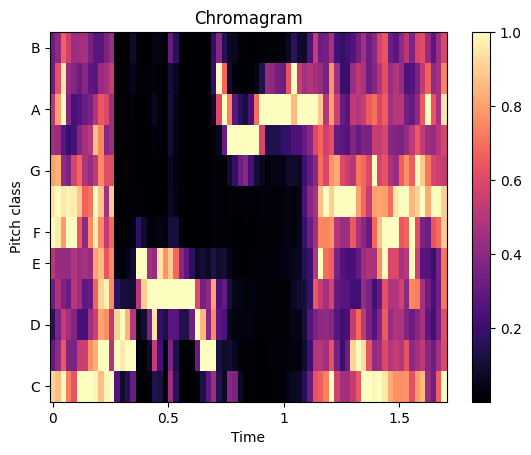

In [75]:
# Chroma stft
data, sr = librosa.load(fear_path)
S = np.abs(librosa.stft(data, n_fft=4096))**2
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Chromagram')

[Text(0.5, 1.0, 'Constant Q Chromagram')]

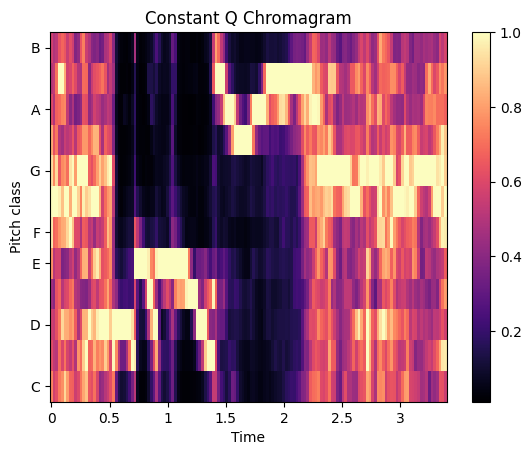

In [76]:
# Constant-Q chromagram
data, sr = librosa.load(fear_path)
chroma_cq = librosa.feature.chroma_cqt(y=data, sr=sr)
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Constant Q Chromagram')

[Text(0.5, 1.0, 'Chroma CENS')]

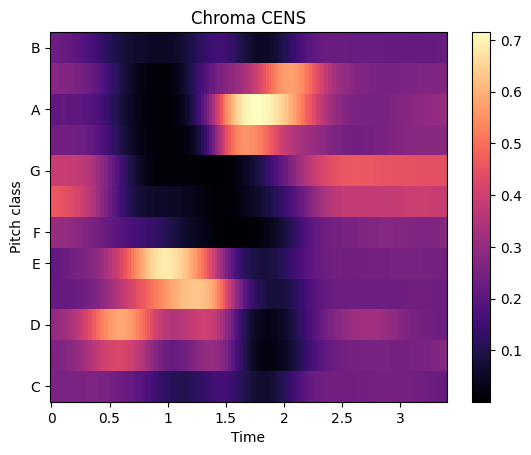

In [77]:
# Chroma CENS
y, sr = librosa.load(fear_path)
chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Chroma CENS')

[Text(0.5, 1.0, 'log Power spectrogram')]

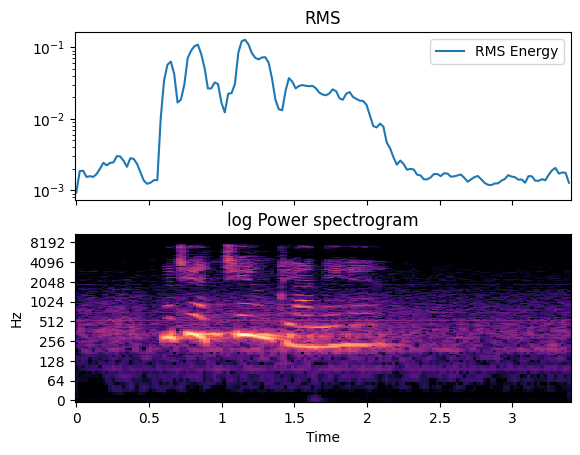

In [78]:
# RMS
y, sr = librosa.load(fear_path)
S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rms(S=S)
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].set(title='RMS')
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(
    librosa.amplitude_to_db(S, ref=np.max),
    y_axis='log', 
    x_axis='time', 
    ax=ax[1]
)
ax[1].set(title='log Power spectrogram')

In [79]:
# Centroid
y, sr = librosa.load(fear_path)
centroid = librosa.feature.spectral_centroid(y=y, sr=sr)

# Spectral Bandwidth
y, sr = librosa.load(fear_path)
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)

# Spectral Contrast
y, sr = librosa.load(fear_path)
S = np.abs(librosa.stft(y))
contrast = librosa.feature.spectral_contrast(S=S, sr=sr)

# Spectral Flatness
flatness = librosa.feature.spectral_flatness(y=y)

# Spectral roll off
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.99)

# Tonnetz
y = librosa.effects.harmonic(y)
tonnetz = librosa.feature.tonnetz(y=y, sr=sr)

# Chroma CQT
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)

[Text(0, 0.5, 'Frequency bands'), Text(0.5, 1.0, 'Spectral contrast')]

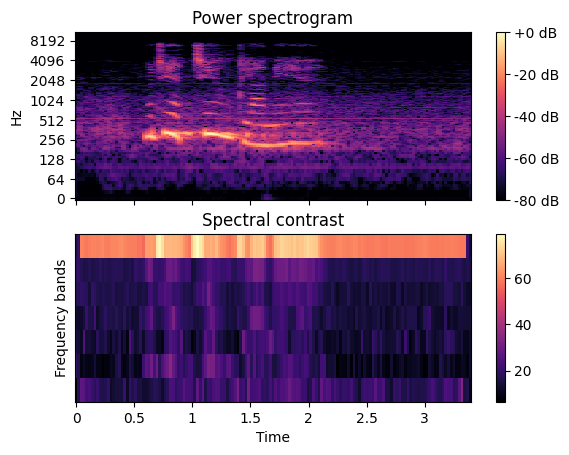

In [80]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                 ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img1, ax=[ax[0]], format='%+2.0f dB')
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
img2 = librosa.display.specshow(contrast, x_axis='time', ax=ax[1])
fig.colorbar(img2, ax=[ax[1]])
ax[1].set(ylabel='Frequency bands', title='Spectral contrast')

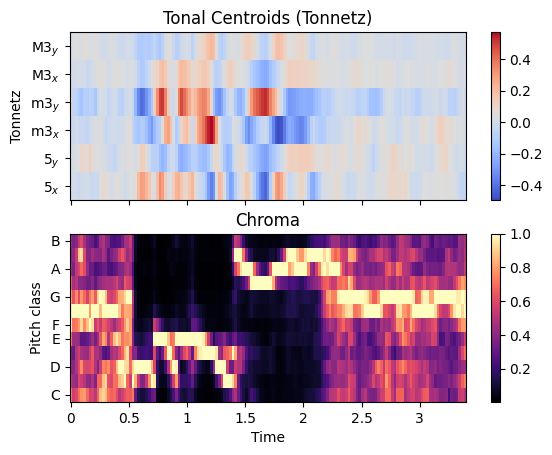

In [81]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(tonnetz,
                                y_axis='tonnetz', x_axis='time', ax=ax[0])
ax[0].set(title='Tonal Centroids (Tonnetz)')
ax[0].label_outer()
img2 = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='Chroma')
fig.colorbar(img1, ax=[ax[0]])
fig.colorbar(img2, ax=[ax[1]])

In [82]:
# all emotions in the new dataset
int2emotion_new = {
    "anger": "angry",
    "disgust": "disgust",
    "fear": "afraid",
    "happy": "happy",
    "neutral": "calm",
    "sad": "sad",
    "sarcastic": "sarcastic",
    "surprise": "surprise",
}

# we allow only these four emotions
AVAILABLE_EMOTIONS_NEW = set(int2emotion_new.values())

def extract_feature(file_name, **kwargs):
    """
    Extract feature from audio file `file_name`
    Features supported:
        - MFCC (mfcc)
        - Chroma (chroma)
        - MEL Spectrogram Frequency (mel)
        - Contrast (contrast)
        - Tonnetz (tonnetz)
    e.g:
    `features = extract_feature(path, mel=True, mfcc=True)`
    """
    mfcc = kwargs.get("mfcc")
    chroma = kwargs.get("chroma")
    mel = kwargs.get("mel")
    contrast = kwargs.get("contrast")
    tonnetz = kwargs.get("tonnetz")
    
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate
        
        if chroma or contrast:
            stft = np.abs(librosa.stft(X))
            
        result = np.array([])
        
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
            result = np.hstack((result, chroma))
            
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
            result = np.hstack((result, mel))
            
        if contrast:
            contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T, axis=0)
            result = np.hstack((result, contrast))
            
        if tonnetz:
            tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T, axis=0)
            result = np.hstack((result, tonnetz))
            
    return result

def load_data_new(test_size=0.2):
    X, y = [], []

    try:
        dataset_path = '../artifacts/dataset/**/*.wav'

        for file_name in glob.glob(dataset_path, recursive=True):
            # get the emotion label from the path
            emotion_folder = os.path.basename(os.path.dirname(file_name))
            emotion = int2emotion_new.get(emotion_folder)
            
            # check if the emotion is in the allowed set
            if emotion not in AVAILABLE_EMOTIONS_NEW:
                continue

            # extract speech features
            features = extract_feature(file_name, mfcc=True, chroma=True, mel=True)

            # add to data
            X.append(features)
            y.append(emotion)

    except Exception as e:
        print(f"Error: {e}")

    # split the data to training and testing and return it
    return train_test_split(np.array(X), y, test_size=test_size, random_state=7)

X_train_new, X_test_new, y_train_new, y_test_new = load_data_new()

In [83]:
print("[+] Number of training samples:", X_train_new.shape[0])
print("[+] Number of testing samples:", X_test_new.shape[0])
print("[+] Number of features:", X_train_new.shape[1])

[+] Number of training samples: 2560
[+] Number of testing samples: 640
[+] Number of features: 140


Accuracy: 0.4703125


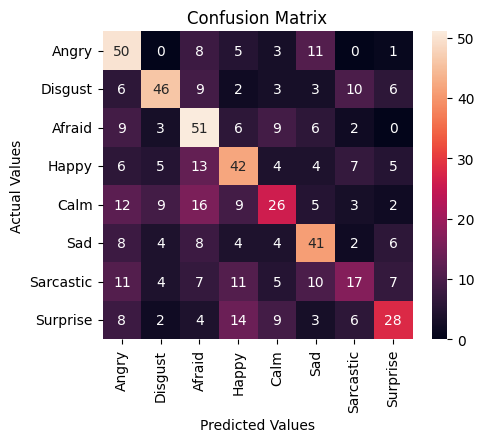

Classification Report:
               precision    recall  f1-score   support

       Angry       0.45      0.64      0.53        78
     Disgust       0.63      0.54      0.58        85
      Afraid       0.44      0.59      0.50        86
       Happy       0.45      0.49      0.47        86
        Calm       0.41      0.32      0.36        82
         Sad       0.49      0.53      0.51        77
   Sarcastic       0.36      0.24      0.29        72
    Surprise       0.51      0.38      0.43        74

    accuracy                           0.47       640
   macro avg       0.47      0.47      0.46       640
weighted avg       0.47      0.47      0.46       640



In [84]:
# Assuming X_train_new, y_train_new, X_test_new, and y_test_new are defined for the new dataset

# Training a KNN classifier
knn = KNeighborsClassifier(n_neighbors=7).fit(X_train_new, y_train_new)

# Accuracy on X_test_new
accuracy = knn.score(X_test_new, y_test_new)
print("Accuracy:", accuracy)

# Creating a confusion matrix
knn_predictions = knn.predict(X_test_new)
cmm = confusion_matrix(y_test_new, knn_predictions)

# Printing confusion matrix
emotions = ["Angry", "Disgust", "Afraid", "Happy", "Calm", "Sad", "Sarcastic", "Surprise"]
cm_df = pd.DataFrame(cmm, index=emotions, columns=emotions)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# Printing classification report
report = classification_report(y_test_new, knn_predictions, target_names=emotions)
print("Classification Report:\n", report)

Accuracy: 0.64375


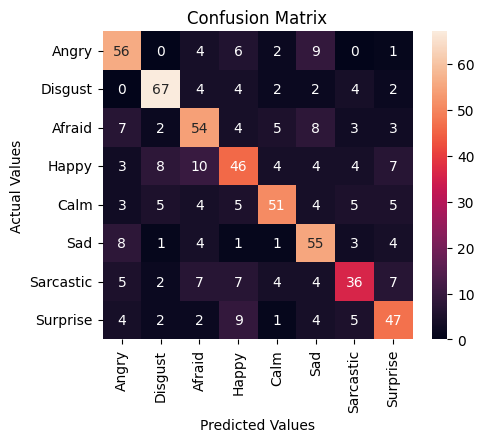

Classification Report:
               precision    recall  f1-score   support

      afraid       0.65      0.72      0.68        78
       angry       0.77      0.79      0.78        85
        calm       0.61      0.63      0.62        86
     disgust       0.56      0.53      0.55        86
       happy       0.73      0.62      0.67        82
         sad       0.61      0.71      0.66        77
   sarcastic       0.60      0.50      0.55        72
    surprise       0.62      0.64      0.63        74

    accuracy                           0.64       640
   macro avg       0.64      0.64      0.64       640
weighted avg       0.64      0.64      0.64       640



In [85]:
# Assuming X_train_new, y_train_new, X_test_new, and y_test_new are defined for the new dataset

# Create RandomForestClassifier object
classifier = RandomForestClassifier(n_estimators=150, random_state=0)

# Fit the classifier with X_train_new and y_train_new data
classifier.fit(X_train_new, y_train_new)

# Predict on X_test_new
predictions = classifier.predict(X_test_new)

# Print accuracy
print("Accuracy:", accuracy_score(y_true=y_test_new, y_pred=predictions))

# Create and display the confusion matrix
emotions = ["Angry", "Disgust", "Afraid", "Happy", "Calm", "Sad", "Sarcastic", "Surprise"]
cm = confusion_matrix(y_test_new, predictions)
cm_df = pd.DataFrame(cm, index=emotions, columns=emotions)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# Printing classification report
print("Classification Report:\n", classification_report(y_test_new, predictions))

[*] Training the MLP model...
Accuracy: 54.37%


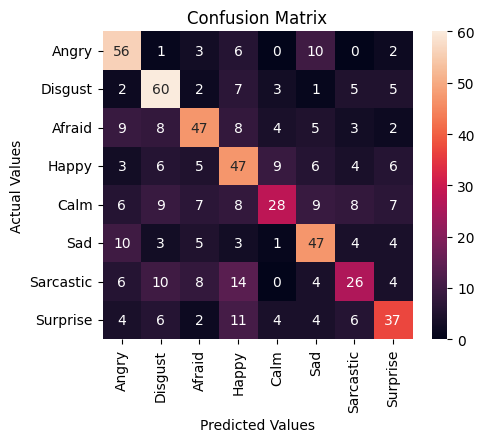

              precision    recall  f1-score   support

      afraid       0.58      0.72      0.64        78
       angry       0.58      0.71      0.64        85
        calm       0.59      0.55      0.57        86
     disgust       0.45      0.55      0.49        86
       happy       0.57      0.34      0.43        82
         sad       0.55      0.61      0.58        77
   sarcastic       0.46      0.36      0.41        72
    surprise       0.55      0.50      0.52        74

    accuracy                           0.54       640
   macro avg       0.54      0.54      0.54       640
weighted avg       0.54      0.54      0.54       640



In [86]:
from sklearn.neural_network import MLPClassifier

# Initialize Multi-Layer Perceptron classifier
model_params = {
    'alpha': 0.01,
    'batch_size': 256,
    'epsilon': 1e-08,
    'hidden_layer_sizes': (300,),
    'learning_rate': 'adaptive',
    'max_iter': 500,
}

mlp_model = MLPClassifier(**model_params)

# Train the model
print("[*] Training the MLP model...")
mlp_model.fit(X_train_new, y_train_new)

# Predict on test data
y_pred = mlp_model.predict(X_test_new)

# Calculate accuracy
accuracy = accuracy_score(y_true=y_test_new, y_pred=y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

cm=confusion_matrix(y_test_new,y_pred)
cm_df = pd.DataFrame(
    cm,
    index = ["Angry", "Disgust", "Afraid", "Happy", "Calm", "Sad", "Sarcastic", "Surprise"],
    columns = ["Angry", "Disgust", "Afraid", "Happy", "Calm", "Sad", "Sarcastic", "Surprise"])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

print(classification_report(y_test_new,y_pred))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 138, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 69, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 67, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 33, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 31, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 15, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3840)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       983,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,108,872 (4.23 MB)

 Trainable params: 1,108,872 (4.23 MB)

 Non-trainable params: 0 (0.00 B)

None
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

CNN Classification Report:
              precision    recall  f1-score   support

      afraid       0.59      0.69      0.64        78
       angry       0.71      0.56      0.63        85
        calm       0.52      0.56      0.54        86
     disgust       0.56      0.44      0.49        86
       happy       0.48      0.48      0.48        82
         sad       0.61      0.57      0.59        77
   sarcastic       0.47      0.47      0.47        72
    surprise       0.52      0.66      0.58        74

    accuracy                           0.55       640
   macro avg       0.56      0.55      0.55       640
weighted avg       0.56      0.55      0.55       640



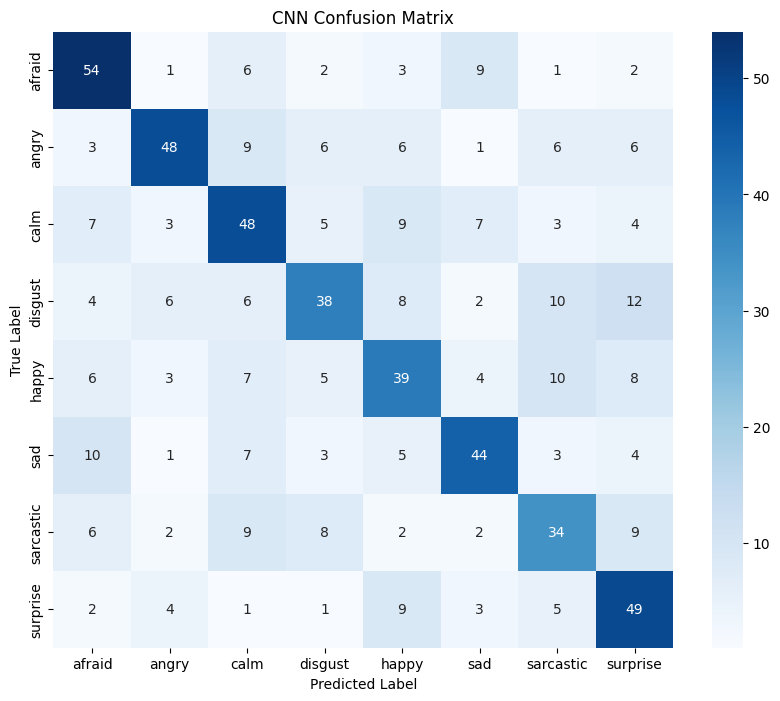

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 140, 64)        │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 128)            │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,472 (181.53 KB)

 Trainable params: 46,472 (181.53 KB)

 Non-trainable params: 0 (0.00 B)

None
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step

RNN Classification Report:
              precision    recall  f1-score   support

      afraid       0.00      0.00      0.00        78
       angry       0.00      0.00      0.00        85
        calm       0.00      0.00      0.00        86
     disgust       0.00      0.00      0.00        86
       happy       0.00      0.00      0.00        82
         sad       0.00      0.00      0.00        77
   sarcastic       0.00      0.00      0.00        72
    surprise       0.12      1.00      0.21        74

    accuracy                           0.12       640
   macro avg       0.01      0.12      0.03       640
weighted avg       0.01      0.12      0.02       640



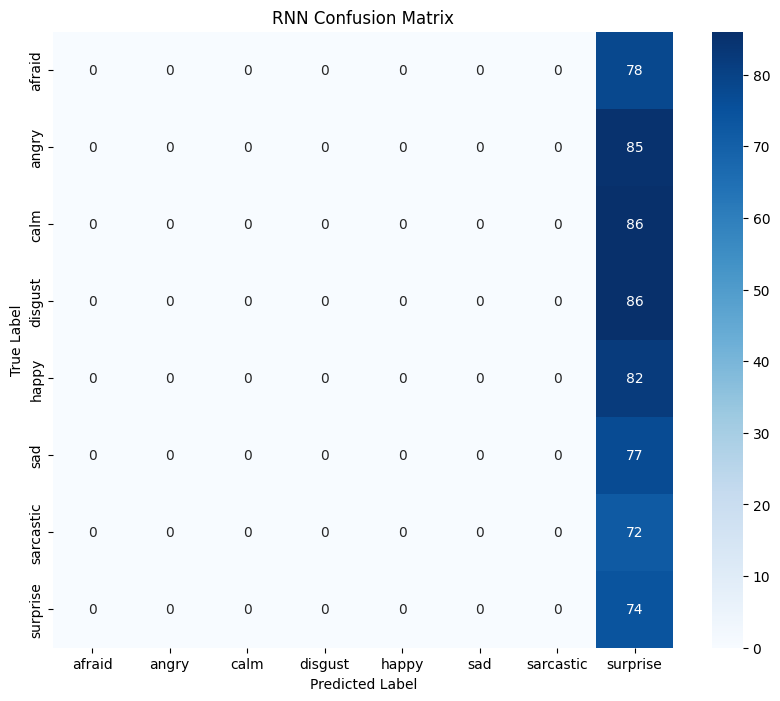

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 140, 64)        │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,256 (520.53 KB)

 Trainable params: 133,256 (520.53 KB)

 Non-trainable params: 0 (0.00 B)

None
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step

LSTM Classification Report:
              precision    recall  f1-score   support

      afraid       0.26      0.36      0.30        78
       angry       0.74      0.41      0.53        85
        calm       0.23      0.20      0.21        86
     disgust       0.25      0.03      0.06        86
       happy       0.21      0.17      0.19        82
         sad       0.23      0.34      0.28        77
   sarcastic       0.22      0.12      0.16        72
    surprise       0.18      0.42      0.25        74

    accuracy                           0.25       640
   macro avg       0.29      0.26      0.25       640
weighted avg       0.29      0.25      0.25       640



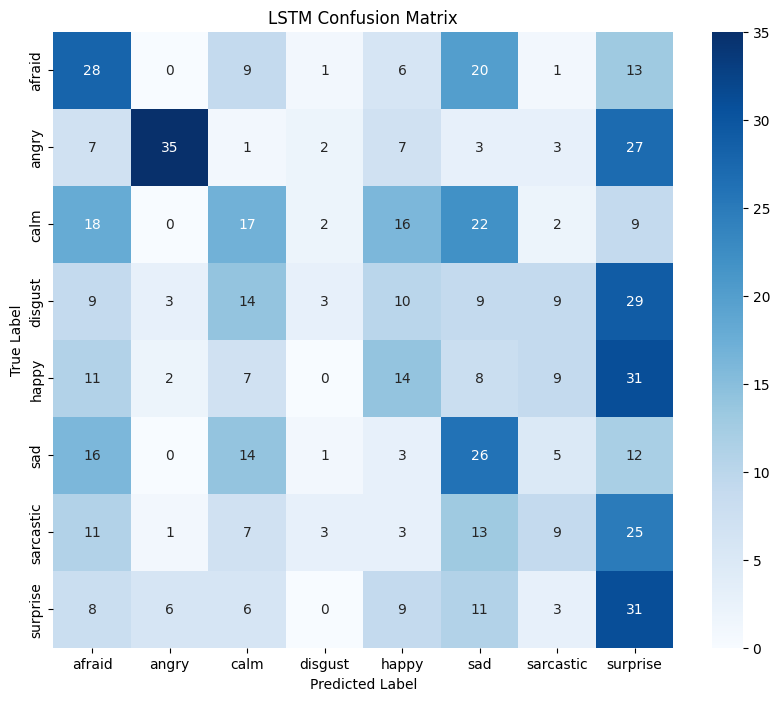

In [88]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, LSTM, SimpleRNN, Flatten
from tensorflow.keras.utils import to_categorical

# Prepare the data
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train_new)
y_test_encoded = le.transform(y_test_new)

# Convert to categorical
y_train_cat = to_categorical(y_train_encoded)
y_test_cat = to_categorical(y_test_encoded)

# Reshape input data for CNN/RNN/LSTM
X_train_reshaped = X_train_new.reshape(X_train_new.shape[0], X_train_new.shape[1], 1)
X_test_reshaped = X_test_new.reshape(X_test_new.shape[0], X_test_new.shape[1], 1)

def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv1D(64, 3, activation='relu', input_shape=input_shape),
        MaxPooling1D(2),
        Conv1D(128, 3, activation='relu'),
        MaxPooling1D(2),
        Conv1D(256, 3, activation='relu'),
        MaxPooling1D(2),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    print(model.summary())
    return model

def create_rnn_model(input_shape, num_classes):
    model = Sequential([
        SimpleRNN(64, input_shape=input_shape, return_sequences=True),
        SimpleRNN(128),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    print(model.summary())
    return model

def create_lstm_model(input_shape, num_classes):
    model = Sequential([
        LSTM(64, input_shape=input_shape, return_sequences=True),
        LSTM(128),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    print(model.summary())
    return model

def train_and_evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    model.compile(
        optimizer='adam', 
        loss='categorical_crossentropy', 
        metrics=['accuracy']
    )
    
    model.fit(
        X_train, y_train, 
        batch_size=32, 
        epochs=50, 
        validation_split=0.2, 
        verbose=0
    )
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    
    # Print classification report
    print(f"\n{model_name} Classification Report:")
    print(classification_report(
        y_test_classes, 
        y_pred_classes, 
        target_names=le.classes_
    ))
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test_classes, y_pred_classes)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_,
                yticklabels=le.classes_)
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Train and evaluate models
input_shape = (X_train_reshaped.shape[1], 1)
num_classes = len(np.unique(y_train_encoded))

# CNN
cnn_model = create_cnn_model(input_shape, num_classes)
train_and_evaluate_model(cnn_model, "CNN", X_train_reshaped, X_test_reshaped, 
                        y_train_cat, y_test_cat)

# RNN
rnn_model = create_rnn_model(input_shape, num_classes)
train_and_evaluate_model(rnn_model, "RNN", X_train_reshaped, X_test_reshaped, 
                        y_train_cat, y_test_cat)

# LSTM
lstm_model = create_lstm_model(input_shape, num_classes)
train_and_evaluate_model(lstm_model, "LSTM", X_train_reshaped, X_test_reshaped, 
                        y_train_cat, y_test_cat)